## EM in python


### 此处省略一万步证明

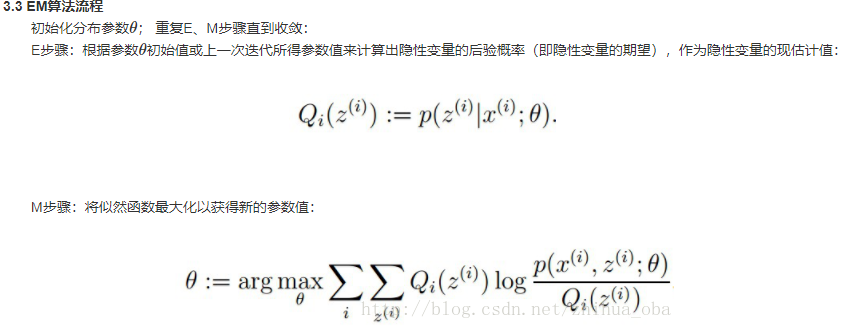

***********
初始观测数据X：
[[39.13174274 14.50435112 11.24461501 39.00011693 43.12704323 31.41533515
  17.74810842 44.09211145 27.73710617 26.29431073  9.43245704 18.28786933
  25.00789416 15.5191948  16.95635024 36.4309639  31.24006835 45.35933984
  44.28332592 48.80389883 34.57527414 16.31771936 38.3555752   8.54522592
  43.98504303 53.92873034 26.39920154 23.7985232  41.15878212 43.80684927
  13.83950695 16.68849005 38.96388367 43.2733354  20.27236975 41.83166374
  50.37334436 22.03026499 46.44327155 55.66840489 48.62593419 45.09686398
  36.97457172 20.21979341 37.9918742  46.03951502 32.38732279 36.87693335
  28.09552561 32.2071131  20.90073936 24.59830504 12.67361278 36.03800869
  36.58443858 37.22500709 49.20413352 24.02762976 40.74390572 20.55538428
  21.30144851 14.98341805 32.50278814 23.12912568 26.383438   24.14172229
  37.84836071 22.163538   23.17973593 18.99466152 21.148496   22.88663324
  21.31714715 15.28423591 43.5274459  43.5349954  33.17792106 32.49261718
  42.4998758  22.

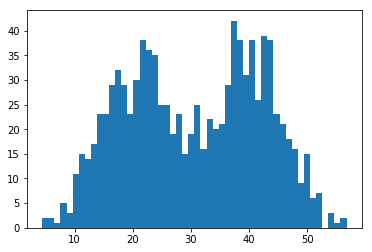

In [6]:
# -*- coding: utf-8 -*-

import numpy as np
import math  
import copy  
import matplotlib.pyplot as plt  

isdebug = True

# 参考文献：机器学习TomM.Mitchell P.137
# 代码参考http://blog.csdn.net/chasdmeng/article/details/38709063

# 指定k个高斯分布参数，这里指定k=2。注意2个高斯分布具有相同均方差Sigma，均值分别为Mu1,Mu2。  
def init_data(Sigma,Mu1,Mu2,k,N):  
    global X  
    global Mu  
    global Expectations  
    X = np.zeros((1,N))  
    Mu = np.random.random(k)  
    Expectations = np.zeros((N,k))  
    for i in range(0,N):  
        if np.random.random(1) > 0.5:  
            X[0,i] = np.random.normal(Mu1, Sigma)
        else:  
            X[0,i] = np.random.normal(Mu2, Sigma)
    if isdebug:  
        print("***********")
        print("初始观测数据X：")
        print(X )
        
# EM算法：步骤1，计算E[zij]  
def e_step(Sigma, k, N):  
    global Expectations  
    global Mu  
    global X  
    for i in range(0,N):  
        Denom = 0 
        Numer = [0.0] * k
        for j in range(0,k):  
            Numer[j] = math.exp((-1/(2*(float(Sigma**2))))*(float(X[0,i]-Mu[j]))**2)  
            Denom += Numer[j]
        for j in range(0,k):  
            Expectations[i,j] = Numer[j] / Denom  
    if isdebug:  
        print("***********")
        print("隐藏变量E（Z）：")
        print(Expectations)
        
# EM算法：步骤2，求最大化E[zij]的参数Mu  
def m_step(k,N):  
    global Expectations  
    global X  
    for j in range(0,k):  
        Numer = 0  
        Denom = 0  
        for i in range(0,N):  
            Numer += Expectations[i,j]*X[0,i]  
            Denom +=Expectations[i,j]  
        Mu[j] = Numer / Denom
        
# 算法迭代iter_num次，或达到精度Epsilon停止迭代  
def run(Sigma,Mu1,Mu2,k,N,iter_num,Epsilon):  
    init_data(Sigma,Mu1,Mu2,k,N)  
    print("初始<u1,u2>:", Mu)
    for i in range(iter_num):  
        Old_Mu = copy.deepcopy(Mu)  
        e_step(Sigma,k,N)  
        m_step(k,N)  
        print(i,Mu)
        if sum(abs(Mu - Old_Mu)) < Epsilon:  
            break  

if __name__ == '__main__':
    sigma = 6   # 高斯分布具有相同的方差
    mu1 = 40    # 第一个高斯分布的均值 用于产生样本
    mu2 = 20    # 第二个高斯分布的均值 用于产生样本
    k = 2       # 高斯分布的个数
    N = 1000    # 样本个数
    iter_num = 1000 # 最大迭代次数
    epsilon = 0.0001    # 当两次误差小于这个时退出
    run(sigma,mu1,mu2,k,N,iter_num,epsilon)  
   
    plt.hist(X[0,:],50)  
    plt.show()